In [95]:
import h5py
from mpl_toolkits.axes_grid1 import AxesGrid

def PlotLocalize(start, stop):
    fig = plt.figure(figsize=(10,10))

    grid = AxesGrid(fig, 111, # similar to subplot(142)
                        nrows_ncols = (4, 3),
                        axes_pad = 0.0,
                        share_all=True,
                        label_mode = "L",
                        cbar_location = "right",
                        cbar_mode="single",)

    for i in range(start,stop):
        k=i-start
        
        #plt.subplot(3,4,i+1)
        h5 = h5py.File('../mod_c/mod_k_'+str(i)+'_XCO_stripped.hdf5', 'r')
        #for f in h5['/fit_results/']:
            #print f  
        ll =  h5['/fit_results/localize/'].attrs['fval']
        ar =  h5['/fit_results/localize/'].attrs['longitudes']

        im = grid[k].imshow(2*(ll-np.min(ll)) ,vmin=0, vmax=200, origin='lower', extent=[min(ar),max(ar),min(ar),max(ar)],
                            interpolation='nearest',cmap='gnuplot')


    


        label = [r'$f_{\rm sprl}=%1.2f$'%j for j in np.linspace(0,.5,11)]

        #plt.colorbar(im, label=(r'$2\Delta\log{(\mathcal{L})}$'))
        grid[k].text(.25,-.90, label[k], fontsize=8)
        if i in [0,3,6,9]:
            grid[k].set_ylabel(r'$b$ [deg]')
        if i in [9,10]:
            grid[k].set_xlabel(r'$l$ [deg]')
        #plt.show()

    grid.cbar_axes[0].colorbar(im)
    for cax in grid.cbar_axes[1:]:
            cax.toggle_label(False)

    grid.cbar_axes[0].set_ylabel(r'$2\Delta\log{(\mathcal{L})}$') 



# PEB MODELS

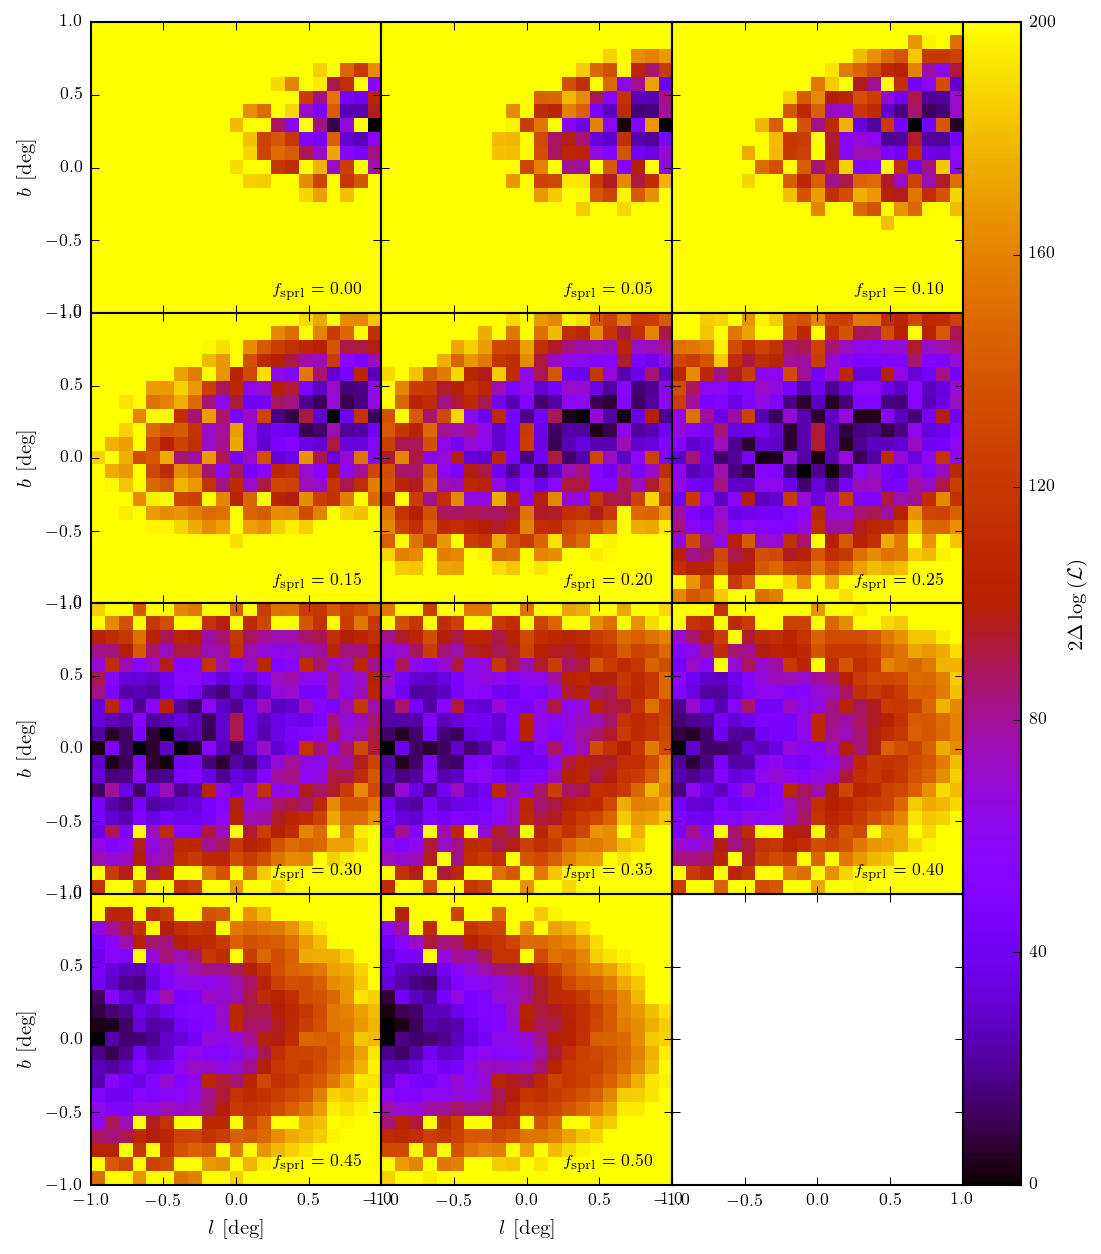

In [93]:
PlotLocalize(0,11)

# GALPROP Models

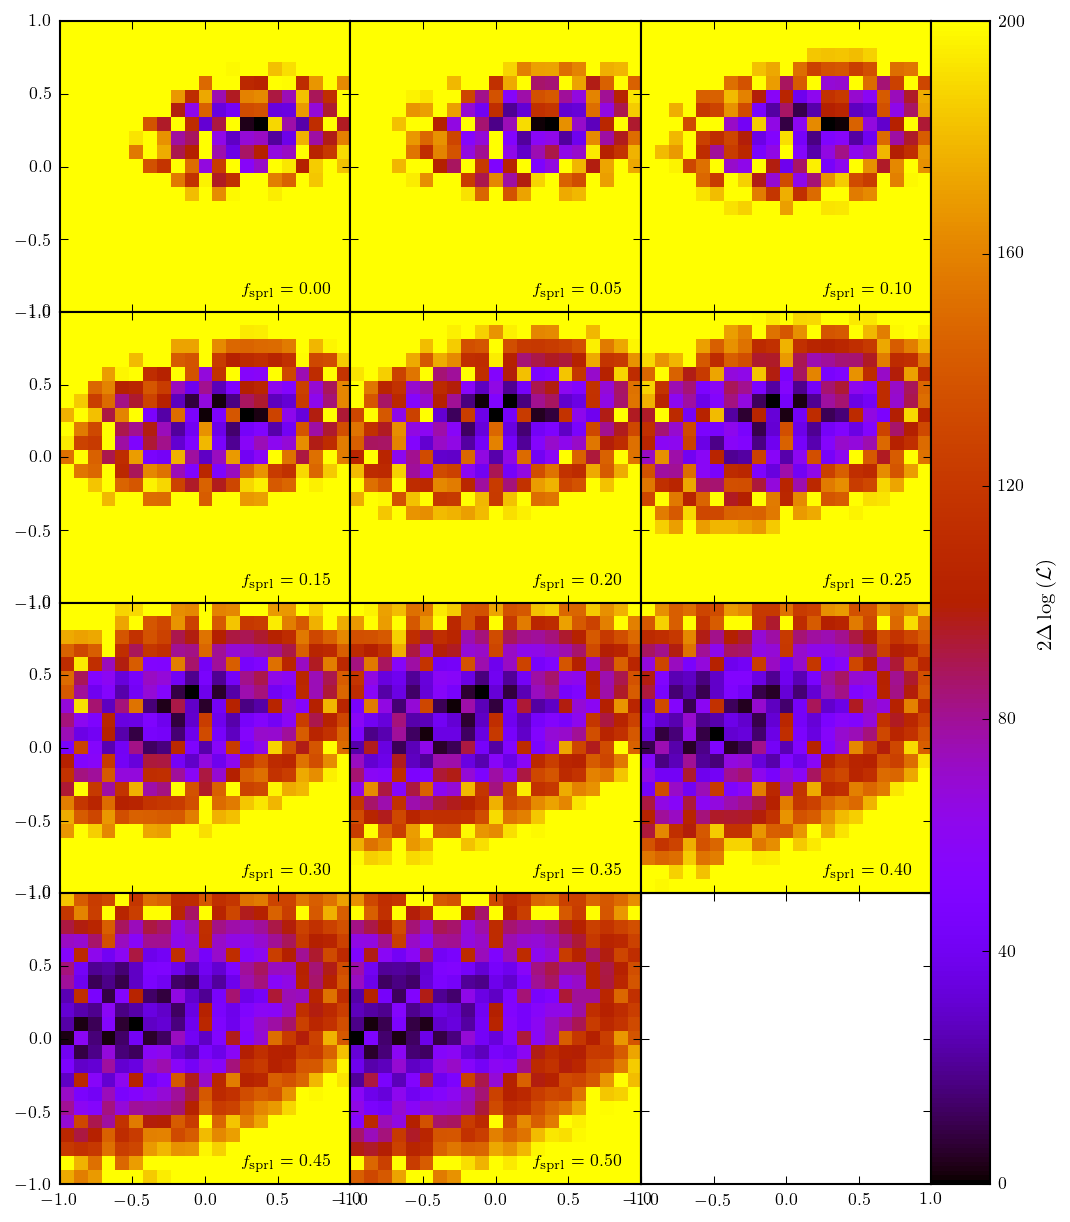

In [96]:
PlotLocalize(43,54)